In [0]:
#Librerias usadas en la prueba
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt
from matplotlib import pyplot
import os

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from math import sqrt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
totalhouses=pd.read_csv('gdrive/My Drive/Colab Notebooks/Proyecto/halfhourly_dataset/totalhouses.csv', parse_dates=['tstp'], index_col="tstp")


In [35]:
totalhouses.head()

,house1,house2,house3,house4,house5,house6,house7,house8,house9,house10,house11,consumo_agregado
tstp,,,,,,,,,,,,
2011-11-23 13:00:00,0.110,0.075,0.055,0.938,0.201,0.049,0.010,0.250,0.176,0.151,0.458,2.473
2011-11-23 14:00:00,0.244,0.064,0.144,1.650,0.185,0.048,0.000,0.163,0.092,0.059,0.534,3.183
2011-11-23 15:00:00,0.287,0.185,0.116,0.713,0.486,0.049,0.000,0.162,0.158,0.086,0.242,2.484
2011-11-23 16:00:00,0.253,0.141,0.070,0.297,0.258,0.048,0.000,0.171,0.066,0.148,0.172,1.624
2011-11-23 17:00:00,0.234,0.226,0.329,0.760,0.272,0.048,0.078,0.381,0.062,0.137,0.218,2.745


In [0]:
len(totalhouses)

39665

In [0]:
totalhouses.index = totalhouses.index.floor('1H')

In [0]:
totalhouses.head()

,house1,house2,house3,house4,house5,house6,house7,house8,house9,house10,house11,consumo_agregado
tstp,,,,,,,,,,,,
2011-11-23 13:00:00,0.110,0.075,0.055,0.938,0.201,0.049,0.01,0.250,0.176,0.151,0.458,2.473
2011-11-23 14:00:00,0.244,0.064,0.144,1.650,0.185,0.048,0.00,0.163,0.092,0.059,0.534,3.183
2011-11-23 14:00:00,0.241,0.318,0.106,0.752,0.248,0.048,0.00,0.177,0.093,0.088,0.353,2.424
2011-11-23 15:00:00,0.287,0.185,0.116,0.713,0.486,0.049,0.00,0.162,0.158,0.086,0.242,2.484
2011-11-23 15:00:00,0.296,0.121,0.139,0.261,0.281,0.048,0.00,0.162,0.142,0.116,0.324,1.890


In [0]:
totalhouses = totalhouses.loc[~totalhouses.index.duplicated(keep='first')]

In [0]:
totalhouses.head()

,house1,house2,house3,house4,house5,house6,house7,house8,house9,house10,house11,consumo_agregado
tstp,,,,,,,,,,,,
2011-11-23 13:00:00,0.110,0.075,0.055,0.938,0.201,0.049,0.010,0.250,0.176,0.151,0.458,2.473
2011-11-23 14:00:00,0.244,0.064,0.144,1.650,0.185,0.048,0.000,0.163,0.092,0.059,0.534,3.183
2011-11-23 15:00:00,0.287,0.185,0.116,0.713,0.486,0.049,0.000,0.162,0.158,0.086,0.242,2.484
2011-11-23 16:00:00,0.253,0.141,0.070,0.297,0.258,0.048,0.000,0.171,0.066,0.148,0.172,1.624
2011-11-23 17:00:00,0.234,0.226,0.329,0.760,0.272,0.048,0.078,0.381,0.062,0.137,0.218,2.745


In [0]:
consumo_agregado=totalhouses[['consumo_agregado']]

In [0]:
consumo_agregado.head()

,consumo_agregado
tstp,
2011-11-23 13:00:00,2.473
2011-11-23 14:00:00,3.183
2011-11-23 15:00:00,2.484
2011-11-23 16:00:00,1.624
2011-11-23 17:00:00,2.745


In [0]:
consumo_agregado.index

DatetimeIndex(['2011-11-23 13:00:00', '2011-11-23 14:00:00',
               '2011-11-23 15:00:00', '2011-11-23 16:00:00',
               '2011-11-23 17:00:00', '2011-11-23 18:00:00',
               '2011-11-23 19:00:00', '2011-11-23 20:00:00',
               '2011-11-23 21:00:00', '2011-11-23 22:00:00',
               ...
               '2014-02-27 15:00:00', '2014-02-27 16:00:00',
               '2014-02-27 17:00:00', '2014-02-27 18:00:00',
               '2014-02-27 19:00:00', '2014-02-27 20:00:00',
               '2014-02-27 21:00:00', '2014-02-27 22:00:00',
               '2014-02-27 23:00:00', '2014-02-28 00:00:00'],
              dtype='datetime64[ns]', name='tstp', length=19848, freq=None)

In [0]:
clima=pd.read_csv('gdrive/My Drive/Colab Notebooks/Proyecto/halfhourly_dataset/weather_hourly_darksky.csv', parse_dates=['time'], index_col="time")

In [0]:
#clima=pd.read_csv("weather_hourly_darksky.csv", parse_dates=['time'], index_col="time")

In [0]:
clima.head()

,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
time,,,,,,,,,,,
2011-11-11 00:00:00,5.97,104,10.24,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy
2011-11-11 01:00:00,4.88,99,9.76,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy
2011-11-11 02:00:00,3.70,98,9.46,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy
2011-11-11 03:00:00,3.12,99,9.23,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy
2011-11-11 04:00:00,1.85,111,9.26,9.21,1015.98,7.24,3.70,rain,fog,1.00,Foggy


In [0]:
clima.index.year.unique()

Int64Index([2011, 2012, 2013, 2014], dtype='int64', name='time')

In [0]:
clima1=clima[['temperature', 'windSpeed', 'humidity']]

In [0]:
clima1.head()

,temperature,windSpeed,humidity
time,,,
2011-11-11 00:00:00,10.24,2.77,0.91
2011-11-11 01:00:00,9.76,2.95,0.94
2011-11-11 02:00:00,9.46,3.17,0.96
2011-11-11 03:00:00,9.23,3.25,0.96
2011-11-11 04:00:00,9.26,3.70,1.00


In [0]:
clima1.index

DatetimeIndex(['2011-11-11 00:00:00', '2011-11-11 01:00:00',
               '2011-11-11 02:00:00', '2011-11-11 03:00:00',
               '2011-11-11 04:00:00', '2011-11-11 05:00:00',
               '2011-11-11 06:00:00', '2011-11-11 07:00:00',
               '2011-11-11 08:00:00', '2011-11-11 09:00:00',
               ...
               '2014-02-15 14:00:00', '2014-02-15 15:00:00',
               '2014-02-15 16:00:00', '2014-02-15 17:00:00',
               '2014-02-15 18:00:00', '2014-02-15 19:00:00',
               '2014-02-15 20:00:00', '2014-02-15 21:00:00',
               '2014-02-15 22:00:00', '2014-02-15 23:00:00'],
              dtype='datetime64[ns]', name='time', length=21165, freq=None)

In [0]:
df1=pd.merge(consumo_agregado, clima1, left_index=True, right_index=True, how="inner")

In [0]:
df1.head()

,consumo_agregado,temperature,windSpeed,humidity
2011-11-23 13:00:00,2.473,9.87,3.12,0.82
2011-11-23 14:00:00,3.183,10.36,3.26,0.84
2011-11-23 15:00:00,2.484,10.09,3.04,0.85
2011-11-23 16:00:00,1.624,9.84,2.95,0.86
2011-11-23 17:00:00,2.745,9.14,2.58,0.92


In [0]:
len(df1)

19846

In [0]:
#Saber que columnas del dataset tienen valores nulos en sus celdas
null_columns=df1.columns[df1.isnull().any()]
null_columns

Index([], dtype='object')

In [0]:
df1.dtypes

consumo_agregado    float64
temperature         float64
windSpeed           float64
humidity            float64
dtype: object

In [0]:
df1.to_csv('gdrive/My Drive/Colab Notebooks/Proyecto/halfhourly_dataset/consumoagregadoclima.csv')

In [0]:
#Visualizacion de los datos 
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

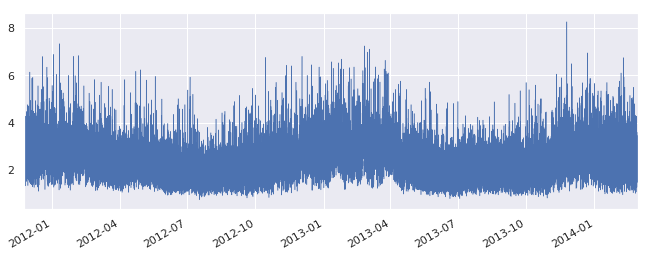

In [0]:
df1['consumo_agregado'].plot(linewidth=0.5)

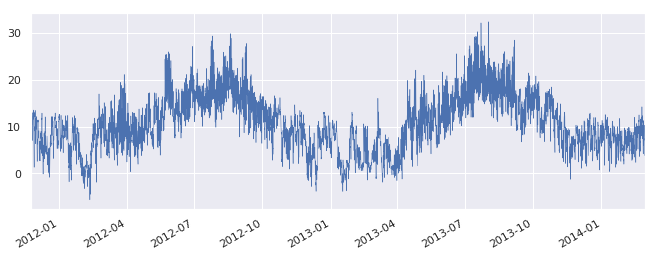

In [0]:
df1['temperature'].plot(linewidth=0.5)

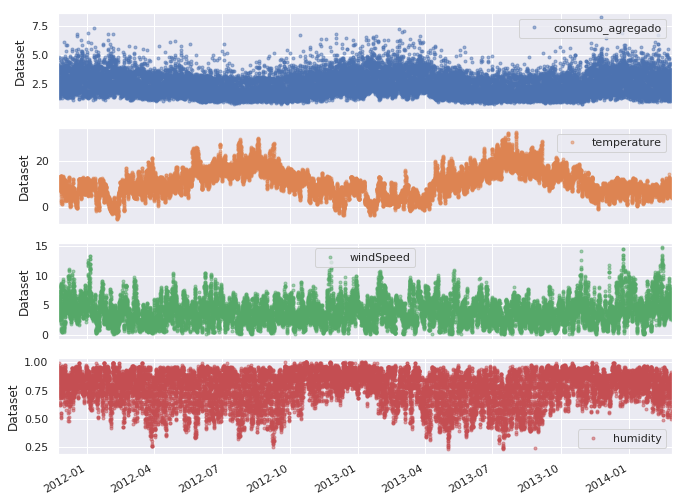

In [0]:
cols_plot = ['consumo_agregado', 'temperature', 'windSpeed', 'humidity']
axes = df1[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Dataset')

Text(0, 0.5, 'Daily Consumption (kWh/hh)')

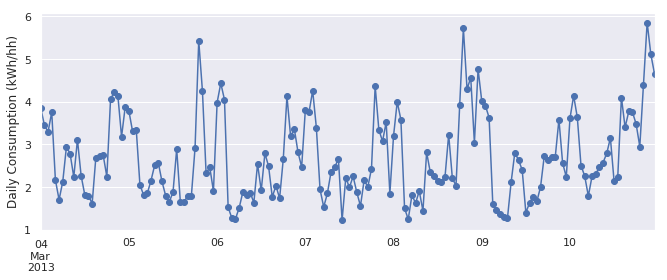

In [0]:
#Visualizacion del consumo agregado durante 1 semana
ax = df1.loc['2013-03-04':'2013-03-10', 'consumo_agregado'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (kWh/hh)')

Text(0, 0.5, 'Daily Consumption (kWh/hh)')

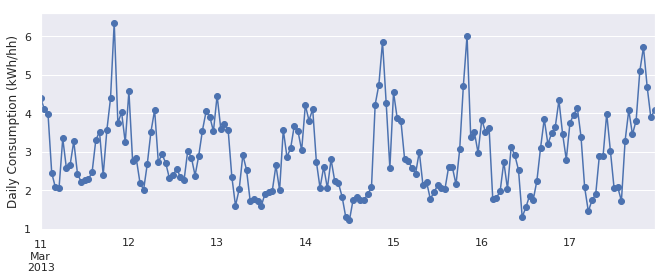

In [0]:
#Visualizacion del consumo agregado durante 1 semana
ax = df1.loc['2013-03-11':'2013-03-17', 'consumo_agregado'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (kWh/hh)')

Text(0, 0.5, 'Daily Consumption (kWh/hh)')

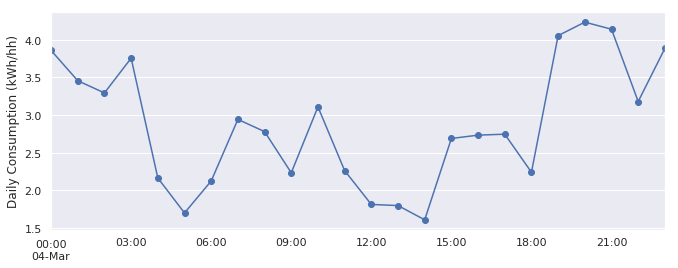

In [0]:
##Visualizacion del consumo agregado durante un lunes
ax = df1.loc['2013-03-04', 'consumo_agregado'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (kWh/hh)')

Text(0, 0.5, 'Daily Consumption (kWh/hh)')

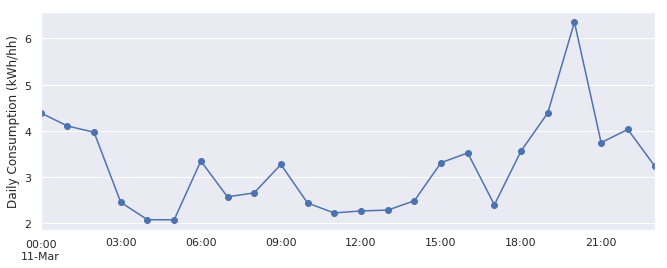

In [0]:
##Visualizacion del consumo agregado durante un lunes siguiente
ax = df1.loc['2013-03-11', 'consumo_agregado'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (kWh/hh)')

In [0]:
#Multivariate LSTM Forecast Model


In [0]:
df2 = pd.read_csv('gdrive/My Drive/Colab Notebooks/Proyecto/halfhourly_dataset/casa2.csv', parse_dates=['tstp'], index_col="tstp")

In [0]:
#Dataset usado para la prueba
df1.head()

,consumo_agregado,temperature,windSpeed,humidity
2011-11-23 13:00:00,2.473,9.87,3.12,0.82
2011-11-23 14:00:00,3.183,10.36,3.26,0.84
2011-11-23 15:00:00,2.484,10.09,3.04,0.85
2011-11-23 16:00:00,1.624,9.84,2.95,0.86
2011-11-23 17:00:00,2.745,9.14,2.58,0.92


In [0]:
len(df1)

19846

In [0]:
dataset = df1.values

In [0]:
# normalizamos el conjunto de datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = scaler.fit_transform(dataset)

In [0]:
''' Dividiendo el dataset en training y test '''
dataset = dataset_scaled
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

15876 3970


In [0]:
train[0]

array([0.23051343, 0.40772871, 0.20867209, 0.76623377])

In [0]:
'''Funcion para crear tramas de tiempo con look backs '''
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [99]:
''' Creating time frames with look backs '''
look_back = 100
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

15776
3870


In [100]:
trainX.shape

(15776, 100, 4)

In [0]:
''' Re-shaping data for model requirement '''
trainX = np.reshape(trainX, (trainX.shape[0], 100, trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], 100, testX.shape[2]))

Train on 15776 samples, validate on 3870 samples
Epoch 1/100
 - 24s - loss: 0.0114 - val_loss: 0.0106
Epoch 2/100
 - 22s - loss: 0.0088 - val_loss: 0.0103
Epoch 3/100
 - 22s - loss: 0.0084 - val_loss: 0.0092
Epoch 4/100
 - 22s - loss: 0.0081 - val_loss: 0.0093
Epoch 5/100
 - 22s - loss: 0.0078 - val_loss: 0.0088
Epoch 6/100
 - 22s - loss: 0.0075 - val_loss: 0.0083
Epoch 7/100
 - 22s - loss: 0.0073 - val_loss: 0.0083
Epoch 8/100
 - 22s - loss: 0.0071 - val_loss: 0.0081
Epoch 9/100
 - 22s - loss: 0.0069 - val_loss: 0.0080
Epoch 10/100
 - 22s - loss: 0.0070 - val_loss: 0.0080
Epoch 11/100
 - 22s - loss: 0.0068 - val_loss: 0.0081
Epoch 12/100
 - 22s - loss: 0.0069 - val_loss: 0.0079
Epoch 13/100
 - 22s - loss: 0.0067 - val_loss: 0.0082
Epoch 14/100
 - 22s - loss: 0.0067 - val_loss: 0.0082
Epoch 15/100
 - 22s - loss: 0.0066 - val_loss: 0.0082
Epoch 16/100
 - 22s - loss: 0.0066 - val_loss: 0.0081
Epoch 17/100
 - 22s - loss: 0.0066 - val_loss: 0.0076
Epoch 18/100
 - 22s - loss: 0.0066 - val_l

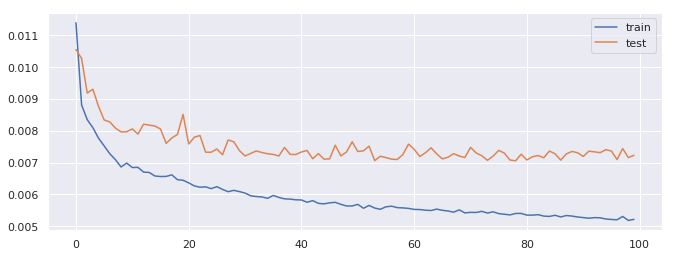

In [102]:
''' Fitting the data in LSTM Deep Learning model '''
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
#model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
history = model.fit(trainX, trainY, epochs=100, batch_size=100, validation_data=(testX, testY), verbose=2, shuffle=True)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [103]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 100)               42000     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 42,101
Trainable params: 42,101
Non-trainable params: 0
_________________________________________________________________


In [104]:

yhat = model.predict(testX)
yhat[0:5]

array([[0.26585793],
       [0.29338038],
       [0.28325742],
       [0.2640952 ],
       [0.2385325 ]], dtype=float32)

In [0]:
yhat1= yhat[:,0]

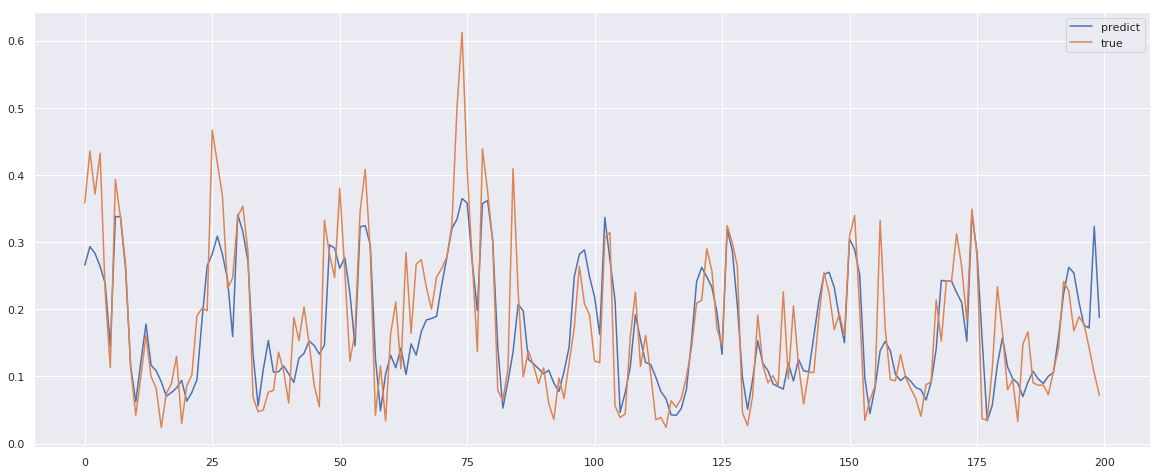

In [105]:
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[0:200], label='predict')
pyplot.plot(testY[0:200], label='true')
pyplot.legend()
pyplot.show()

In [106]:
print("Mean squared error: %.3f" % mean_squared_error(testY, yhat))

Mean squared error: 0.007


In [107]:
print("Root mean squared error: %.3f" % sqrt(mean_squared_error(testY, yhat)))

Root mean squared error: 0.085


In [108]:
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))

Variance : 0.599


In [0]:
# create empty table with 4 fields
testPredict_dataset_like = np.zeros(shape=(len(yhat), 4) )
# put the predicted values in the right field
testPredict_dataset_like[:,0] = yhat[:,0]
# inverse transform and then select the right field
testPredict = scaler.inverse_transform(testPredict_dataset_like)[:,0]

In [0]:
# create empty table with 4 fields
testY_dataset_like = np.zeros(shape=(len(testY), 4) )
# put the predicted values in the right field
testY_dataset_like[:,0] = testY[:]
# inverse transform and then select the right field
testYnormal = scaler.inverse_transform(testY_dataset_like)[:,0]

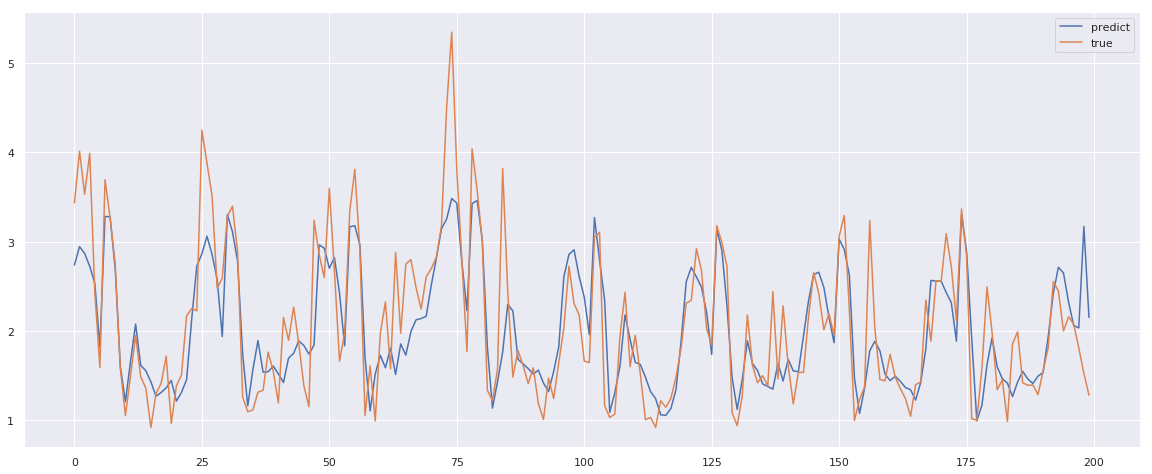

In [111]:
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(testPredict[0:200], label='predict')
pyplot.plot(testYnormal[0:200], label='true')
pyplot.legend()
pyplot.show()

In [112]:
print("Mean squared error: %.3f" % mean_squared_error(testYnormal, testPredict))

Mean squared error: 0.409


In [113]:
print("Root mean squared error: %.3f" % sqrt(mean_squared_error(testYnormal, testPredict)))

Root mean squared error: 0.639


In [114]:
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testYnormal, testPredict))

Variance : 0.599


In [0]:
#Probando con solo datos de clima y haciendo una predicción de consumo energético

In [36]:
df1.head()

,consumo_agregado,temperature,windSpeed,humidity
2011-11-23 13:00:00,2.473,9.87,3.12,0.82
2011-11-23 14:00:00,3.183,10.36,3.26,0.84
2011-11-23 15:00:00,2.484,10.09,3.04,0.85
2011-11-23 16:00:00,1.624,9.84,2.95,0.86
2011-11-23 17:00:00,2.745,9.14,2.58,0.92


In [37]:
df1.dtypes

consumo_agregado    float64
temperature         float64
windSpeed           float64
humidity            float64
dtype: object

In [0]:
# normalizamos el conjunto de datos
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df1)

In [40]:
''' Dividing data in test and train sets '''
#dataset = df1.values
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

15876 3970


In [0]:
'''Funcion para crear tramas de tiempo con look backs '''
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 1:4]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [61]:
''' Creating time frames with look backs '''
look_back = 200
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

15676
3770


In [43]:
trainX[0]

array([[0.40772871, 0.20867209, 0.76623377],
       [0.42060988, 0.21815718, 0.79220779],
       [0.41351209, 0.20325203, 0.80519481],
       [0.40694006, 0.19715447, 0.81818182],
       [0.38853838, 0.17208672, 0.8961039 ],
       [0.38801262, 0.19444444, 0.87012987],
       [0.38669821, 0.20460705, 0.90909091],
       [0.37670873, 0.19783198, 0.90909091],
       [0.36750789, 0.19715447, 0.93506494],
       [0.36487907, 0.18360434, 0.97402597],
       [0.3840694 , 0.19918699, 0.93506494],
       [0.38512093, 0.19512195, 0.94805195],
       [0.38459516, 0.17818428, 0.92207792],
       [0.37329127, 0.17682927, 0.94805195],
       [0.38564669, 0.20392954, 0.94805195],
       [0.37907466, 0.20460705, 0.94805195],
       [0.40036803, 0.19783198, 0.92207792],
       [0.38696109, 0.16734417, 0.93506494],
       [0.3785489 , 0.16192412, 0.98701299],
       [0.39432177, 0.20325203, 0.94805195],
       [0.41430074, 0.22493225, 0.93506494],
       [0.4371714 , 0.24051491, 0.90909091],
       [0.

In [44]:
trainY[0]

0.3637935572786173

In [0]:
''' Re-shaping data for model requirement '''
trainX = np.reshape(trainX, (trainX.shape[0], 200, trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], 200, testX.shape[2]))

Train on 15676 samples, validate on 3770 samples
Epoch 1/100
 - 45s - loss: 0.0158 - val_loss: 0.0157
Epoch 2/100
 - 44s - loss: 0.0105 - val_loss: 0.0119
Epoch 3/100
 - 44s - loss: 0.0100 - val_loss: 0.0118
Epoch 4/100
 - 44s - loss: 0.0097 - val_loss: 0.0119
Epoch 5/100
 - 44s - loss: 0.0097 - val_loss: 0.0116
Epoch 6/100
 - 44s - loss: 0.0095 - val_loss: 0.0113
Epoch 7/100
 - 44s - loss: 0.0094 - val_loss: 0.0116
Epoch 8/100
 - 44s - loss: 0.0095 - val_loss: 0.0112
Epoch 9/100
 - 44s - loss: 0.0092 - val_loss: 0.0113
Epoch 10/100
 - 44s - loss: 0.0093 - val_loss: 0.0109
Epoch 11/100
 - 44s - loss: 0.0091 - val_loss: 0.0125
Epoch 12/100
 - 44s - loss: 0.0090 - val_loss: 0.0108
Epoch 13/100
 - 45s - loss: 0.0090 - val_loss: 0.0111
Epoch 14/100
 - 45s - loss: 0.0089 - val_loss: 0.0106
Epoch 15/100
 - 44s - loss: 0.0088 - val_loss: 0.0115
Epoch 16/100
 - 45s - loss: 0.0088 - val_loss: 0.0116
Epoch 17/100
 - 45s - loss: 0.0087 - val_loss: 0.0101
Epoch 18/100
 - 46s - loss: 0.0086 - val_l

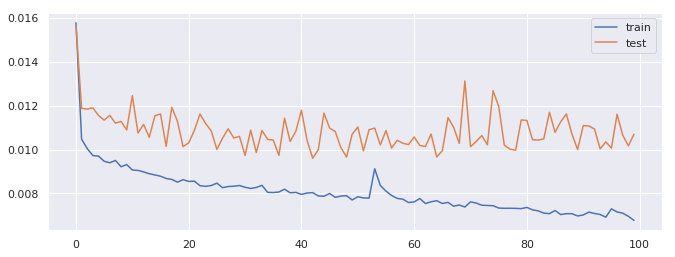

In [63]:
''' Fitting the data in LSTM Deep Learning model '''
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
#model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
history = model.fit(trainX, trainY, epochs=100, batch_size=100, validation_data=(testX, testY), verbose=2, shuffle=True)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [64]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               41600     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 41,701
Trainable params: 41,701
Non-trainable params: 0
_________________________________________________________________


In [65]:
''' Predicting 1 years data based on 5 years of previous data '''
yhat = model.predict(testX)
yhat[0:5]

array([[0.17852369],
       [0.16582873],
       [0.24168077],
       [0.29300213],
       [0.2123411 ]], dtype=float32)

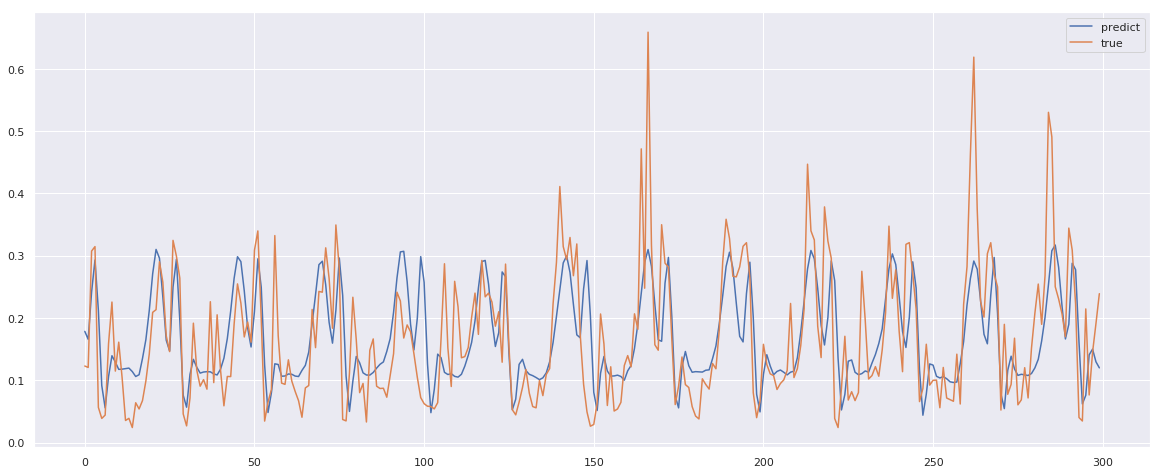

In [66]:
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[0:300], label='predict')
pyplot.plot(testY[0:300], label='true')
pyplot.legend()
pyplot.show()

In [67]:
print("Mean squared error: %.3f" % mean_squared_error(testY, yhat))

Mean squared error: 0.011


In [68]:
print("Root mean squared error: %.3f" % sqrt(mean_squared_error(testY, yhat)))

Root mean squared error: 0.103


In [69]:
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))

Variance : 0.407


In [0]:
# create empty table with 4 fields
testPredict_dataset_like = np.zeros(shape=(len(yhat), 4) )
# put the predicted values in the right field
testPredict_dataset_like[:,0] = yhat[:,0]
# inverse transform and then select the right field
testPredict = scaler.inverse_transform(testPredict_dataset_like)[:,0]

In [0]:
# create empty table with 4 fields
testY_dataset_like = np.zeros(shape=(len(testY), 4) )
# put the predicted values in the right field
testY_dataset_like[:,0] = testY[:]
# inverse transform and then select the right field
testYnormal = scaler.inverse_transform(testY_dataset_like)[:,0]

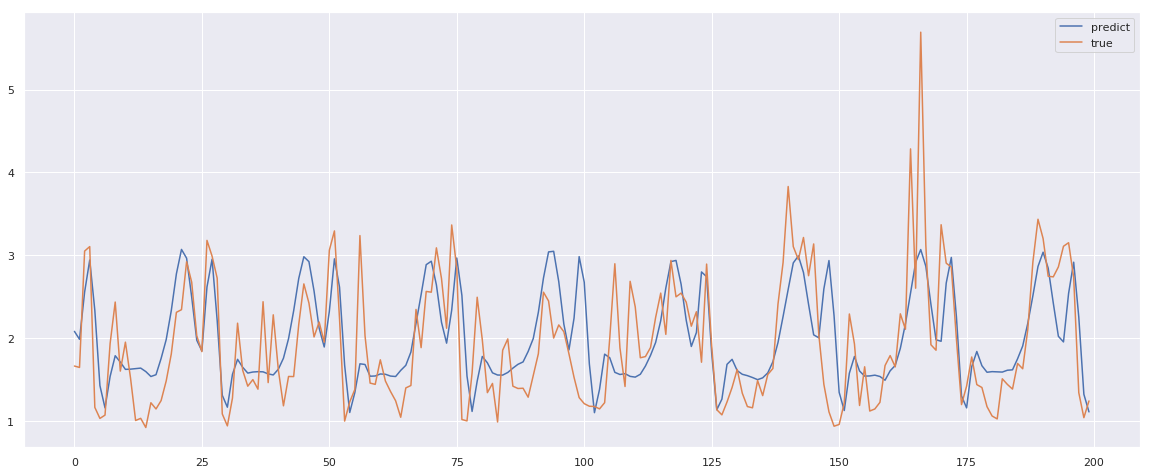

In [73]:
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(testPredict[0:200], label='predict')
pyplot.plot(testYnormal[0:200], label='true')
pyplot.legend()
pyplot.show()

In [74]:
print("Mean squared error: %.3f" % mean_squared_error(testYnormal, testPredict))

Mean squared error: 0.604


In [75]:
print("Root mean squared error: %.3f" % sqrt(mean_squared_error(testYnormal, testPredict)))

Root mean squared error: 0.777


In [76]:
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testYnormal, testPredict))

Variance : 0.407
